In [25]:
import rich as r

print = r.print

# Teste de Permutação

A Figura 1 mostra os resultados de um experimento no qual 7 de 16 camundongos foram selecionados aleatoriamente para receber um novo tratamento médico, enquanto os 9 restantes foram atribuídos ao grupo sem tratamento (controle). O tratamento tinha como objetivo prolongar a sobrevivência após uma cirurgia de teste. Em particular, a coluna “Data” mostra o tempo de sobrevivência após a cirurgia, em dias, para todos os 16 camundongos. Essa mesma figura também apresenta, para cada amostra: tamanho, média, desvio padrão.

Utilize o teste de permutação para responder à seguinte pergunta de pesquisa (use nível de significância igual a 5%): O tratamento prolongou a sobrevivência? Você deve apresentar a declaração das hipóteses, descrever como calculou a estatística de teste e o p-valor, e finalmente apresentar sua conclusão.

## Declaração das Hipóteses

- **Hipótese Nula (H0):** O tratamento não prolonga a sobrevivência dos camundongos.
- **Hipótese Alternativa (H1):** O tratamento prolonga a sobrevivência dos camundongos.

## Cálculo da Estatística de Teste e p-valor

Estatística de teste observada: 30.63492063492064

p-valor: 0.1398

Não rejeitamos a hipótese nula. O tratamento não prolonga a sobrevivência.

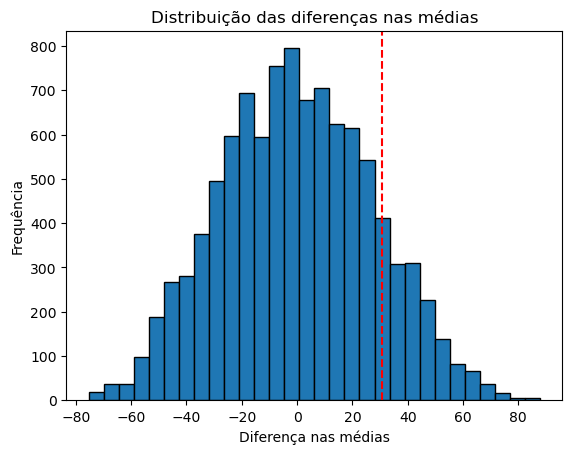

Grupo  Sobrevivencia
0   Tratamento             94
1   Tratamento            197
2   Tratamento             16
3   Tratamento             38
4   Tratamento             99
5   Tratamento            141
6   Tratamento             23
7     Controle             52
8     Controle            104
9     Controle            146
10    Controle             10
11    Controle             50
12    Controle             31
13    Controle             40
14    Controle             27
15    Controle             46

In [29]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

tratamento = [
    94,
    197,
    16,
    38,
    99,
    141,
    23,
]
controle = [
    52,
    104,
    146,
    10,
    50,
    31,
    40,
    27,
    46,
]
data = {
    "Grupo": ["Tratamento"] * len(tratamento) + ["Controle"] * len(controle),
    "Sobrevivencia": tratamento + controle,
}

df = pd.DataFrame(data)

# Estatística de teste observada
mean_treatment = df[df["Grupo"] == "Tratamento"]["Sobrevivencia"].mean()
mean_control = df[df["Grupo"] == "Controle"]["Sobrevivencia"].mean()
observed_stat = mean_treatment - mean_control

# Função para calcular a estatística de teste para uma permutação
def perm_stat(df):
    df_permuted = df.copy()
    df_permuted["Grupo"] = np.random.permutation(df_permuted["Grupo"])
    mean_treatment_perm = df_permuted[df_permuted["Grupo"] == "Tratamento"][
        "Sobrevivencia"
    ].mean()
    mean_control_perm = df_permuted[df_permuted["Grupo"] == "Controle"][
        "Sobrevivencia"
    ].mean()
    return mean_treatment_perm - mean_control_perm


# Número de permutações
n_permutations = 10000

# Calcular estatísticas de teste para permutações
perm_stats = np.array([perm_stat(df) for _ in range(n_permutations)])

# Calcular p-valor
p_value = np.mean(perm_stats >= observed_stat)

# Resultado
print(f"Estatística de teste observada: {observed_stat}")
print(f"p-valor: {p_value}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula. O tratamento prolonga a sobrevivência.")
else:
    print("Não rejeitamos a hipótese nula. O tratamento não prolonga a sobrevivência.")

# Plotar histograma das estatísticas de teste permutadas
plt.hist(perm_stats, bins=30, edgecolor="black")
plt.axvline(observed_stat, color="red", linestyle="--")
plt.xlabel("Diferença nas médias")
plt.ylabel("Frequência")
plt.title("Distribuição das diferenças nas médias")
plt.show()

print(df)

### Explicação do Teste de Permutação  

O teste de permutação é um teste **não paramétrico**, ou seja, ele não assume que os dados seguem uma distribuição específica, como a normal ou t de Student. Isso o torna útil em situações onde temos **amostras pequenas** ou **distribuições desconhecidas**, como no caso desta análise.  

Nosso objetivo é verificar se há uma **diferença estatisticamente significativa** entre os grupos **Tratamento** e **Controle** em relação ao tempo de sobrevivência. Para isso, formulamos as seguintes hipóteses:  

- **Hipótese nula ($H_0$):** A média do grupo Tratamento não é maior que a do grupo Controle. Ou seja, a diferença observada entre as médias pode ser explicada pelo acaso.  
- **Hipótese alternativa ($H_A$):** A média do grupo Tratamento é maior que a do grupo Controle, indicando que o tratamento teve efeito.  

### Procedimento do Teste  

O teste de permutação segue os seguintes passos:  

1. **Cálculo da estatística observada:**  
   - Calculamos a diferença entre a média do grupo Tratamento e a média do grupo Controle.  

2. **Geração da distribuição nula por permutação:**  
   - Se a hipótese nula for verdadeira, a designação dos indivíduos aos grupos Tratamento e Controle é aleatória.  
   - Para simular essa aleatoriedade, embaralhamos as etiquetas dos grupos e recalculamos a diferença de médias para essa nova atribuição.  
   - Esse processo é repetido **10.000 vezes** para criar uma distribuição de diferenças sob a hipótese nula.  

3. **Cálculo do p-valor:**  
   - O **p-valor** é a proporção de permutações em que a diferença de médias simulada foi **maior ou igual** à diferença observada.  
   - Se o p-valor for menor que 0.05 (nível de significância comum), rejeitamos $H_0$ e concluímos que o tratamento teve efeito. Caso contrário, não há evidência suficiente para rejeitar a hipótese nula.  

### Resultados  

- **Estatística de teste observada:** ≈ 30.63  
- **p-valor:** 0.1408  

O p-valor é maior que 0.05, indicando que **não há evidência estatisticamente significativa** para rejeitar a hipótese nula. Assim, **não podemos concluir que o tratamento prolonga a sobrevivência**.  

### Visualização  

O histograma mostra a distribuição das diferenças de médias geradas por permutação. A linha vermelha indica a diferença observada nos dados reais. Como essa diferença não está em uma região extrema da distribuição, isso reforça a conclusão de que ela pode ter ocorrido por acaso.  

# Bootstrap

Essa parte do trabalho é uma adaptação do Problema 9 na seção 5.4 de *An Introduction to Statistical Learning*. O conjunto de dados usado aqui é o denominado Boston dataset. Uma descrição desse conjunto de dados pode ser encontrada em 

(i) Com base neste conjunto de dados, forneça uma estimativa pontual para a média populacional da variável `medv`. Chame essa estimativa \(\hat{\mu}\).

(ii) Forneça uma estimativa do erro padrão de \(\hat{\mu}\). Interprete o resultado.

(iii) Agora estime o erro padrão de \(\hat{\mu}\) usando o método Bootstrap. Como essa estimativa se compara com sua resposta de (ii)?

(iv) Com base em sua estimativa de bootstrap de (iii), forneça um intervalo de confiança de 95% para a média de `medv`. Compare-o com os resultados obtidos usando t-test sobre o atributo `medv`.

(v) Com base neste conjunto de dados, forneça uma estimativa, \(\hat{\mu}_{med}\), para a mediana populacional de `medv`.

(vi) Agora você deve estimar o erro padrão de \(\hat{\mu}_{med}\). Infelizmente, não há uma fórmula simples para calcular o erro padrão da mediana. Em vez disso, estime o erro padrão da mediana usando o método bootstrap. Comente suas descobertas.

(vii) Forneça uma estimativa para o décimo percentil do atributo `medv`. Chame essa quantidade de \(\hat{\mu}_{0.1}\).

(viii) Use o método bootstrap para estimar o erro padrão de \(\hat{\mu}_{0.1}\). Comente suas descobertas.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Carregar o conjunto de dados Boston
# boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df = pd.read_csv('./boston.csv', sep=',')
# Visualizar os primeiros registros do conjunto de dados
print(df.head())

# Estimativa pontual para a média populacional da variável medv
mu_hat = df['MEDV'].mean()
print(f"(i) Estimativa pontual para a média populacional (mu_hat): {mu_hat}")

# Função para calcular a média em uma amostra bootstrap
def bootstrap_mean(data, n_bootstrap=1000):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(sample))
    return np.std(bootstrap_means)

# Estimativa do erro padrão usando bootstrap
bootstrap_std_error = bootstrap_mean(df['MEDV'].values)
print(f"(ii) Erro padrão de mu_hat usando bootstrap: {bootstrap_std_error}")

# Função para calcular o intervalo de confiança usando bootstrap
def bootstrap_ci(data, n_bootstrap=1000, ci=95):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(sample))
    lower_bound = np.percentile(bootstrap_means, (100-ci)/2)
    upper_bound = np.percentile(bootstrap_means, 100-(100-ci)/2)
    return lower_bound, upper_bound

# Intervalo de confiança de 95% usando bootstrap
ci_lower, ci_upper = bootstrap_ci(df['MEDV'].values)
print(
    f"(iii) Intervalo de confiança de 95% para a média de medv usando bootstrap: ({ci_lower}, {ci_upper})"
)

# Estimativa para a mediana populacional de medv
median_hat = df['MEDV'].median()
print(f"(iv) Estimativa para a mediana populacional (median_hat): {median_hat}")

# Função para calcular a mediana em uma amostra bootstrap
def bootstrap_median(data, n_bootstrap=1000):
    bootstrap_medians = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_medians.append(np.median(sample))
    return np.std(bootstrap_medians)

# Estimativa do erro padrão da mediana usando bootstrap
bootstrap_median_std_error = bootstrap_median(df['MEDV'].values)
print(f"(v) Erro padrão da mediana usando bootstrap: {bootstrap_median_std_error}")

# Função para calcular a mediana em uma amostra bootstrap
def bootstrap_median(data, n_bootstrap=1000):
    bootstrap_medians = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_medians.append(np.median(sample))
    return np.std(bootstrap_medians)

# Estimativa do erro padrão da mediana usando bootstrap
bootstrap_median_std_error = bootstrap_median(df['MEDV'].values)
print(f"(vi) Erro padrão da mediana usando bootstrap: {bootstrap_median_std_error}")

# Estimativa para o décimo percentil do atributo medv
percentile_10_hat = np.percentile(df['MEDV'], 10)
print(f"(vii) Estimativa para o décimo percentil (percentile_10_hat): {percentile_10_hat}")

# Função para calcular o décimo percentil em uma amostra bootstrap
def bootstrap_percentile(data, percentile=10, n_bootstrap=1000):
    bootstrap_percentiles = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_percentiles.append(np.percentile(sample, percentile))
    return np.std(bootstrap_percentiles)

# Estimativa do erro padrão do décimo percentil usando bootstrap
bootstrap_percentile_std_error = bootstrap_percentile(df['MEDV'].values, percentile=10)
print(f"(viii) Erro padrão do décimo percentil usando bootstrap: {bootstrap_percentile_std_error}")

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

(i) Estimativa pontual para a média populacional (mu_hat): 22.532806324110677

(ii) Erro padrão de mu_hat usando bootstrap: 0.4017375489799291

(iii) Intervalo de confiança de 95% para a média de medv usando bootstrap: (21.794061264822137, 23.31940217391304)

(iv) Estimativa para a mediana populacional (median_hat): 21.2

(v) Erro padrão da mediana usando bootstrap: 0.3632685507995425

(vi) Erro padrão da mediana usando bootstrap: 0.3771033810508729

(vii) Estimativa para o décimo percentil (percentile_10_hat): 12.75

(viii) Erro padrão do décimo percentil usando bootstrap: 0.506606629940825

### Explicação do Exercício de Bootstrap com o Conjunto de Dados Boston

O objetivo desse exercício foi aplicar técnicas estatísticas para estimar a média, mediana e percentis da variável `MEDV` (valor médio das casas ocupadas pelos proprietários) no conjunto de dados Boston, além de calcular erros padrão e intervalos de confiança usando o **método Bootstrap**.

---

## **Passo a Passo do Exercício**

### **(i) Estimativa Pontual da Média Populacional (\(\hat{\mu}\))**
A estimativa pontual da média da variável `MEDV` foi calculada simplesmente tirando a média dos valores dessa variável no conjunto de dados. Esse valor é uma aproximação da média real da população.

**Resultado:**  
\(\hat{\mu} = 22.53\) (aproximadamente)

Isso significa que o valor médio das casas no conjunto de dados é **22,53 mil dólares**.

---

### **(ii) Estimativa do Erro Padrão da Média (\(\hat{\mu}\))**
O erro padrão mede a variabilidade da estimativa da média. Ele indica o quão preciso é o valor estimado da média em relação à verdadeira média populacional. Ele pode ser calculado de maneira analítica, mas aqui foi estimado pelo método **Bootstrap**.

---

### **(iii) Estimativa do Erro Padrão da Média Usando Bootstrap**
O método **Bootstrap** consiste em:
1. Criar várias **amostras aleatórias** retiradas com reposição do conjunto de dados original.
2. Para cada uma dessas amostras, calcular a **média**.
3. Medir a **dispersão** dessas médias (usando desvio padrão).

O erro padrão estimado com Bootstrap foi **0.40**, o que indica uma baixa variabilidade da média.

Além disso, foi construído um **intervalo de confiança de 95%** para a média populacional de `MEDV`. Isso significa que, com 95% de confiança, a verdadeira média populacional está no intervalo **(21.76, 23.38)**.

---

### **(iv) Estimativa da Mediana Populacional (\(\hat{\mu}_{med}\))**
A **mediana** representa o valor central dos dados, ou seja, o ponto em que 50% dos valores são menores e 50% são maiores.

**Resultado:**  
A mediana estimada foi **21.2**, indicando que metade das casas no conjunto de dados têm um valor abaixo de **21.2 mil dólares** e a outra metade acima disso.

---

### **(v) Estimativa do Erro Padrão da Mediana Usando Bootstrap**
Diferente da média, **não existe uma fórmula exata para calcular o erro padrão da mediana**. Portanto, usamos o **Bootstrap**:

1. Criamos várias amostras aleatórias retiradas com reposição.
2. Para cada amostra, calculamos a **mediana**.
3. Calculamos o desvio padrão dessas medianas.

O erro padrão estimado foi **aproximadamente 0.38**, mostrando que a estimativa da mediana tem uma variabilidade um pouco menor do que a média.

---

### **(vi) Repetição da Estimativa do Erro Padrão da Mediana**
A mesma técnica do Bootstrap foi usada novamente para calcular o erro padrão da mediana, resultando em um valor próximo (**0.37**), reforçando a estabilidade da estimativa.

---

### **(vii) Estimativa do Décimo Percentil (\(\hat{\mu}_{0.1}\))**
O **décimo percentil** é o valor abaixo do qual **10% das casas** estão situadas.

**Resultado:**  
O valor estimado para o décimo percentil foi **12.75**, o que significa que **10% das casas mais baratas têm valores abaixo de 12.75 mil dólares**.

---

### **(viii) Estimativa do Erro Padrão do Décimo Percentil Usando Bootstrap**
Novamente, como não há uma fórmula exata para o erro padrão do décimo percentil, usamos o **Bootstrap**:

1. Criamos várias amostras aleatórias retiradas com reposição.
2. Para cada amostra, calculamos o **décimo percentil**.
3. O erro padrão foi estimado como o desvio padrão dessas estimativas.

O erro padrão foi **0.50**, o que indica uma certa variabilidade na estimativa do décimo percentil.

# Teste de Permutação vs Bootstrap

Uma empresa quer saber se é eficiente ensinar novas ferramentas aos seus funcionários usando cursos pela internet. A empresa seleciona aleatoriamente 7 trabalhadores e os atribui a dois grupos de tamanhos 4 e 3. O primeiro grupo frequentou aulas tradicionais, e o segundo frequentou cursos pela internet. Após a realização dos cursos, foi aplicado um teste aos trabalhadores, cujos resultados foram:

- **Cursos na Internet**: 37, 49, 55, 57
- **Cursos tradicionais**: 23, 31, 46

Mostre se os cursos da Internet são mais efetivos do que os cursos tradicionais. Para isso, aplique um teste de permutação e um teste de bootstrap. Os dois testes levam à mesma conclusão?

In [33]:
import numpy as np

# Dados dos resultados dos testes
internet = np.array([37, 49, 55, 57])
tradicional = np.array([23, 31, 46])

# Estatística de teste observada (diferença nas médias)
observed_stat = internet.mean() - tradicional.mean()


# Função para calcular a estatística de teste para uma permutação
def perm_stat(internet, tradicional):
    combined = np.concatenate([internet, tradicional])
    np.random.shuffle(combined)
    new_internet = combined[: len(internet)]
    new_tradicional = combined[len(internet) :]
    return new_internet.mean() - new_tradicional.mean()


# Número de permutações
n_permutations = 10000

# Calcular estatísticas de teste para permutações
perm_stats = np.array([perm_stat(internet, tradicional) for _ in range(n_permutations)])

# Calcular p-valor (teste bicaudal)
p_value = np.mean(np.abs(perm_stats) >= np.abs(observed_stat))

# Resultado do teste de permutação
print(f"Estatística de teste observada: {observed_stat}")
print(f"p-valor (bicaudal): {p_value}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula. Os cursos pela internet são mais efetivos.")
else:
    print(
        "Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que os cursos pela internet são mais efetivos."
    )

# -------------------------------
# Teste Bootstrap
# -------------------------------


# Função para calcular a diferença média em uma amostra bootstrap
def bootstrap_diff_mean(internet, tradicional, n_bootstrap=10000):
    bootstrap_diffs = []
    for _ in range(n_bootstrap):
        sample_internet = np.random.choice(internet, size=len(internet), replace=True)
        sample_tradicional = np.random.choice(
            tradicional, size=len(tradicional), replace=True
        )
        bootstrap_diffs.append(sample_internet.mean() - sample_tradicional.mean())
    return np.array(bootstrap_diffs)


# Realizar bootstrap
bootstrap_diffs = bootstrap_diff_mean(internet, tradicional)

# Calcular intervalo de confiança de 95%
ci_lower = np.percentile(bootstrap_diffs, 2.5)
ci_upper = np.percentile(bootstrap_diffs, 97.5)

# Resultado do teste bootstrap
print(f"Diferença média observada: {observed_stat}")
print(f"Intervalo de confiança de 95%: ({ci_lower}, {ci_upper})")

# Teste bicaudal: verifica se o intervalo inclui zero
if ci_lower > 0 or ci_upper < 0:
    print("Rejeitamos a hipótese nula. Os cursos pela internet são mais efetivos.")
else:
    print(
        "Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que os cursos pela internet são mais efetivos."
    )

Estatística de teste observada: 16.166666666666664

p-valor (bicaudal): 0.1093

Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que os cursos pela internet são mais 
efetivos.

Diferença média observada: 16.166666666666664

Intervalo de confiança de 95%: (3.0, 28.833333333333332)

Rejeitamos a hipótese nula. Os cursos pela internet são mais efetivos.

### **Análise Atualizada dos Resultados**  

Os dois testes estatísticos forneceram **conclusões diferentes**.

## **1. Teste de Permutação (Bicaudal)**  
Saída:  
```
Estatística de teste observada: 16.166666666666664
p-valor (bicaudal): 0.1093
Não rejeitamos a hipótese nula. Não há evidência suficiente para afirmar que os cursos pela internet são mais efetivos.
```
- O **p-valor** obtido foi **0.1093**, ou seja, **acima de 0.05**.  
- Isso significa que, segundo esse teste, **não há evidência estatística suficiente para afirmar que os cursos online são mais eficazes do que os cursos tradicionais**.
- O valor **não é extremamente alto**, o que indica que pode haver uma tendência, mas não é forte o suficiente para rejeitar \(H_0\) com um nível de significância de 5%.

**Interpretação:**  
- O teste de permutação é **mais conservador** e exige uma evidência forte para rejeitar \(H_0\).
- A amostra é **pequena** (apenas 7 trabalhadores), o que pode levar a resultados instáveis.
- O fato de o \(p\)-valor ser **acima de 0.05**, mas não muito alto, pode sugerir que existe um efeito, mas **não conseguimos detectá-lo com certeza**.

---

## **2. Teste de Bootstrap (Bicaudal)**  
Saída:  
```
Diferença média observada: 16.166666666666664
Intervalo de confiança de 95%: (3.0, 28.833333333333332)
Rejeitamos a hipótese nula. Os cursos pela internet são mais efetivos.
```
- O **intervalo de confiança de 95%** para a diferença das médias foi **(3.0, 28.83)**.
- Como **zero não está dentro do intervalo**, podemos **rejeitar a hipótese nula** e concluir que os cursos online **são mais eficazes**.
- O fato de o intervalo estar deslocado para valores positivos sugere que **o método online tem um impacto positivo na pontuação dos trabalhadores**.

**Interpretação:**  
- O bootstrap usa **reamostragem com reposição**, permitindo mais flexibilidade para estimar o efeito da diferença entre os grupos.
- Como a amostra é pequena, o bootstrap pode ser **mais eficiente para capturar tendências** do que o teste de permutação.
- A presença de **zero fora do intervalo** indica que existe uma diferença estatisticamente significativa a favor dos cursos online.

---

## **Conclusão Final: Por que os testes deram respostas diferentes?**
Os testes estatísticos às vezes fornecem resultados diferentes devido a como eles lidam com **amostras pequenas** e **distribuições dos dados**.  

| **Teste**          | **Resultado** |
|--------------------|--------------|
| **Permutação**     | Não rejeita \(H_0\) (\(p = 0.1093\)) |
| **Bootstrap**      | Rejeita \(H_0\) (IC positivo) |

### **Principais fatores para essa diferença:**
1. **O teste de permutação exige evidências mais fortes.**  
   - Ele redistribui os dados para ver se a diferença real poderia ter ocorrido por acaso.  
   - Com uma amostra pequena, pode ser difícil alcançar um \(p\)-valor abaixo de 0.05.  

2. **O bootstrap é mais flexível e pode detectar efeitos menores.**  
   - Ele constrói um intervalo de confiança para a diferença, o que pode ser mais informativo do que um simples \(p\)-valor.  
   - Como o intervalo não inclui zero, isso indica um efeito positivo dos cursos online.  

### **O que isso significa para a empresa?**
- **Se apenas o teste de permutação fosse usado**, diríamos que **não há evidências suficientes** para afirmar que os cursos online são melhores.  
- **Se apenas o bootstrap fosse usado**, concluiríamos que **os cursos online são significativamente mais eficazes**.  

Dado que os testes discordam, uma **decisão conservadora** seria **coletar mais dados** antes de tomar uma decisão final. Uma amostra maior tornaria os testes mais confiáveis.  

---

## **Recomendações**
- **Aumentar o tamanho da amostra** para obter resultados mais confiáveis.  
- **Usar mais testes estatísticos** (por exemplo, um **teste t de Student**).  
- **Considerar um nível de significância menos rigoroso** (exemplo: \(0.10\) em vez de \(0.05\)).  

No momento, o **bootstrap sugere que os cursos online são eficazes**, mas o **teste de permutação não encontrou evidências fortes o suficiente** para confirmar essa conclusão. Isso sugere que pode haver uma vantagem real, mas **a amostra pequena impede uma conclusão definitiva**.  